In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Reading the dataset

In [1]:
data = "../airflow_first_dag/plugins/the_grammy_awards.csv"

In [4]:
dataW = pd.read_csv(data)

## Initial information about the dataset

In [5]:
print(dataW.shape)

(4810, 10)


In [5]:
dataW.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


In [6]:
dataW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


In [7]:
dataW.describe()

,year
count,4810.000000
mean,1995.566944
std,17.149720
min,1958.000000
25%,1983.000000
50%,1998.000000
75%,2010.000000
max,2019.000000


## Answers to questions asked

¿Ha habido un aumento o disminución en el número de publicaciones y actualizaciones con el tiempo?

In [25]:
conteo_por_año = dataW['year'].value_counts()
print(conteo_por_año)

year
2019    433
2007    111
2008    111
2006    110
2010    109
       ... 
1968     40
1962     39
1960     39
1959     35
1958     28
Name: count, Length: 62, dtype: int64


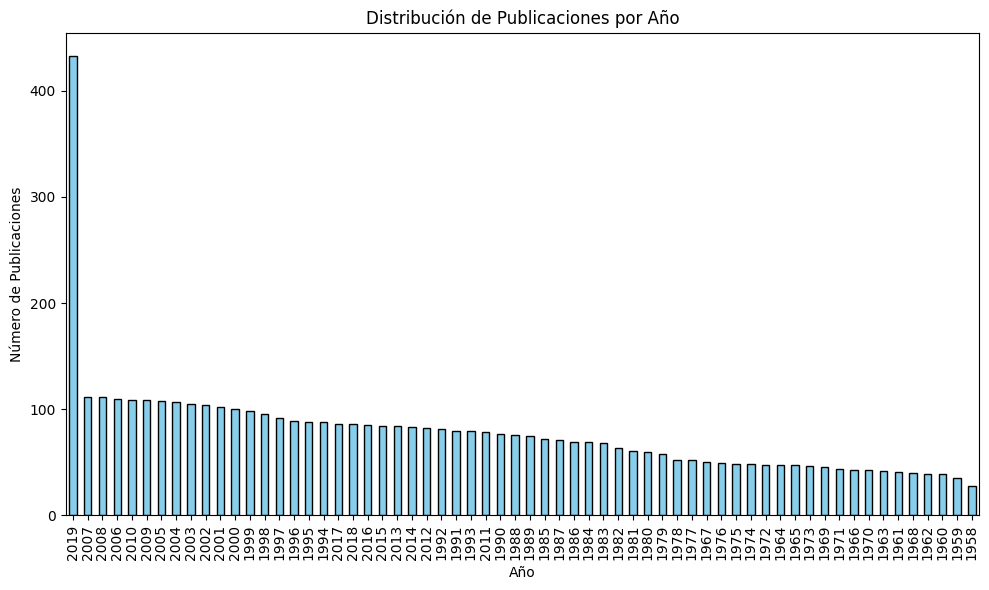

In [24]:
conteo_por_año.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Distribución de Publicaciones por Año')
plt.xlabel('Año')
plt.ylabel('Número de Publicaciones')
plt.tight_layout()  
plt.show()

Colocar aqui la respuesta a la pregunta

- El top de artistas con mas nominaciones

In [30]:
# Agrupar los datos por el nombre del artista y contar el número de nominaciones para cada uno
nominaciones_por_artista = dataW.groupby('artist').size()

# Ordenar en orden descendente y seleccionar los primeros 5 artistas
top_5_artistas = nominaciones_por_artista.sort_values(ascending=False).head(10)

print("Top 5 artistas con más nominaciones:")
print(top_5_artistas)

Top 5 artistas con más nominaciones:
artist
(Various Artists)    66
U2                   18
Aretha Franklin      16
Bruce Springsteen    13
Stevie Wonder        13
Ella Fitzgerald      13
Beyoncé              13
Dixie Chicks         12
Ray Charles          12
Jimmy Sturr          12
dtype: int64


- Cuales son las canciones con mas nominaciones

In [32]:
# Agrupar los datos por el nombre de la canción y contar el número de nominaciones para cada una
nominaciones_por_cancion = dataW.groupby('nominee').size()

# Ordenar en orden descendente y seleccionar el top de nominaciones
top_nominaciones = nominaciones_por_cancion.sort_values(ascending=False).head(20)

print("Top 5 canciones más nominadas:")
print(top_nominaciones)


Top 5 canciones más nominadas:
nominee
Robert Woods                   7
Bridge Over Troubled Water     7
Berlioz: Requiem               7
Steven Epstein                 7
Britten: War Requiem           6
A Taste Of Honey               6
Up, Up And Away                6
David Frost                    6
Mahler: Symphony No. 9 In D    5
Blackstar                      5
Berlioz: Les Troyens           5
Berg: Wozzeck                  5
West Side Story                5
Need You Now                   5
Gentle On My Mind              5
Judith Sherman                 5
King Of The Road               5
Moon River                     4
Genius Loves Company           4
This Land                      4
dtype: int64


- Cuantas categorias existen en el dataset

In [36]:
# Obtener las primeras 10 categorías únicas en la variable 'category'
primeras_10_categorias = dataW['category'].unique()[:10]

print("Primeras 10 categorías únicas:")
print(primeras_10_categorias)


Primeras 10 categorías únicas:
['Record Of The Year' 'Album Of The Year' 'Song Of The Year'
 'Best New Artist' 'Best Pop Solo Performance'
 'Best Pop Duo/Group Performance' 'Best Traditional Pop Vocal Album'
 'Best Pop Vocal Album' 'Best Dance Recording'
 'Best Dance/Electronic Album']


- Cual es la tendencia de categorias al pasar de los años

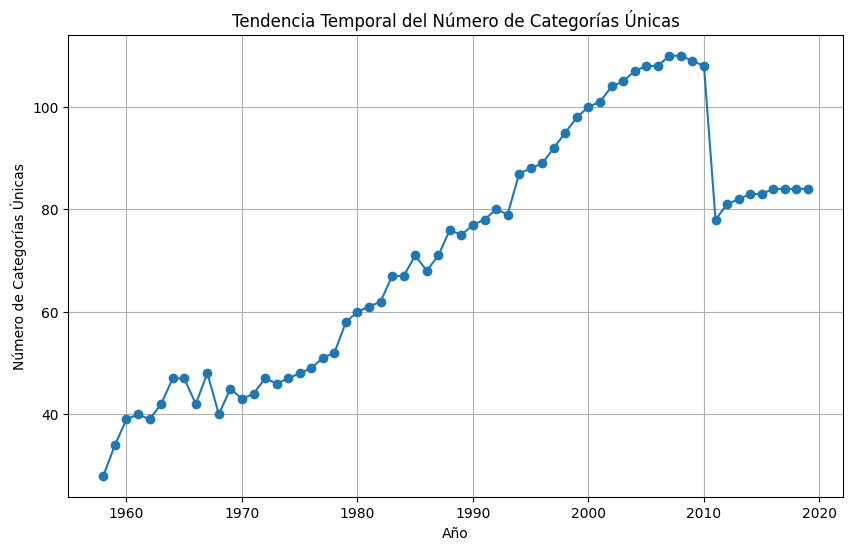

In [38]:

categorias_por_año = dataW.groupby('year')['category'].nunique()

# Crear un gráfico de líneas para visualizar la tendencia temporal del número de categorías únicas
plt.figure(figsize=(10, 6))
plt.plot(categorias_por_año.index, categorias_por_año.values, marker='o')
plt.title('Tendencia Temporal del Número de Categorías Únicas')
plt.xlabel('Año')
plt.ylabel('Número de Categorías Únicas')
plt.grid(True)
plt.show()



- Cuantos winner existen y cuantos no?

In [40]:
conteo_winner = dataW['winner'].value_counts()

print("Número de valores True y False en 'winner':")
print(conteo_winner)



Número de valores True y False en 'winner':
winner
True    4810
Name: count, dtype: int64


    - Vemos que no existe ningun valor tipo False, esto pordria ser indice para una transformaciòn

## Distribucion variables object


In [42]:
# Obtener el número de valores únicos para cada variable en el DataFrame
num_valores_unicos_por_columna = dataW.nunique()

print("Número de valores únicos por variable:")
print(num_valores_unicos_por_columna)


Número de valores únicos por variable:
year              62
title             62
published_at       4
updated_at        10
category         638
nominee         4131
artist          1658
workers         2366
img             1463
winner             1
dtype: int64


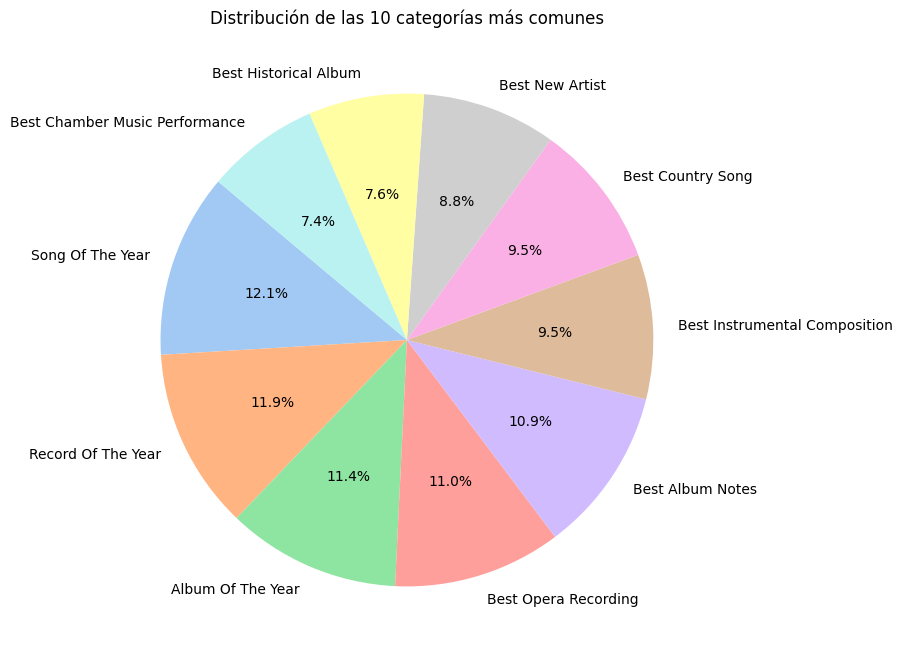

In [44]:

conteo_categorias = dataW['category'].value_counts()

# Crear un gráfico de pastel con las 10 categorías más comunes
plt.figure(figsize=(8, 8))
conteo_categorias.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', 10))
plt.title('Distribución de las 10 categorías más comunes')
plt.ylabel('')
plt.show()



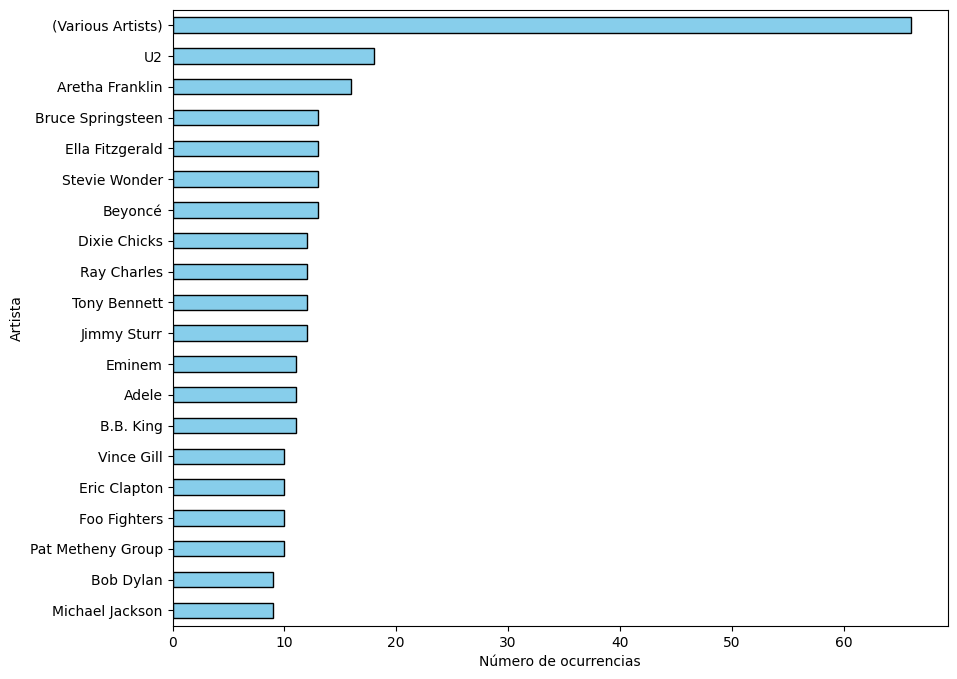

In [46]:
conteo_artistas = dataW['artist'].value_counts()

# Crear un gráfico de barras horizontal
plt.figure(figsize=(10, 8))
conteo_artistas.head(20).sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Número de ocurrencias')
plt.ylabel('Artista')
plt.show()


In [47]:
# Contar la cantidad de valores nulos en cada columna
nulos_por_columna = dataW.isnull().sum()

print("Cantidad de valores nulos por columna:")
print(nulos_por_columna)


Cantidad de valores nulos por columna:
year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64


In [48]:
# Contar la cantidad de filas duplicadas en el conjunto de datos
duplicados = dataW.duplicated().sum()

print("Cantidad de filas duplicadas en el conjunto de datos:", duplicados)


Cantidad de filas duplicadas en el conjunto de datos: 0


C:\Users\playc\AppData\Local\Temp\ipykernel_33936\852318987.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  dataW['updated_at'] = pd.to_datetime(dataW['updated_at'])


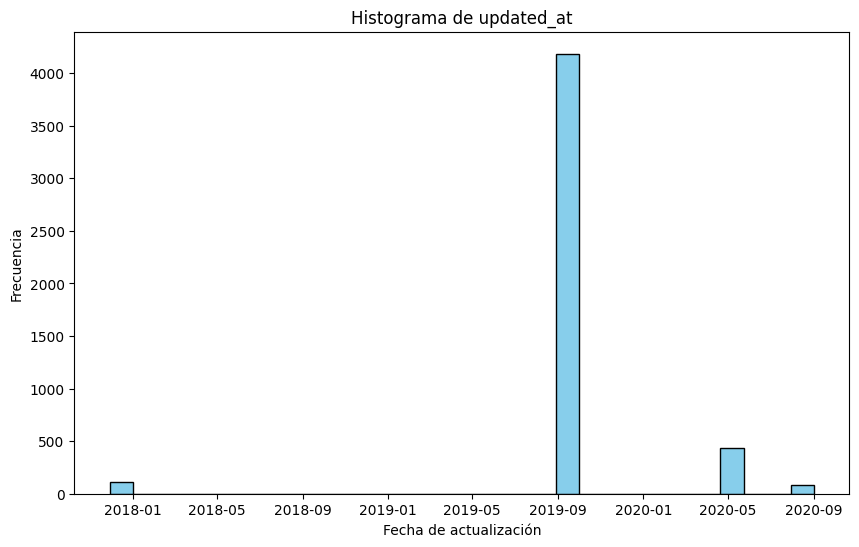

In [49]:
dataW['updated_at'] = pd.to_datetime(dataW['updated_at'])

plt.figure(figsize=(10, 6))
plt.hist(dataW['updated_at'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma de updated_at')
plt.xlabel('Fecha de actualización')
plt.ylabel('Frecuencia')
plt.show()

## Transformations

### Eliminacion de datos faltantes

In [57]:
dataW = dataW.dropna(subset=['nominee'])

### Eliminacion de columnas

In [59]:
# Eliminar las columnas 'uploaded_at', 'img'
dataW = dataW.drop(['updated_at', 'img'], axis=1)

# Mostrar las primeras filas del DataFrame después de eliminar las columnas
print(dataW.head())

   year                              title published_at            category  \
0  2019  62nd Annual GRAMMY Awards  (2019)   2020-05-19  Record Of The Year   
1  2019  62nd Annual GRAMMY Awards  (2019)   2020-05-19  Record Of The Year   
2  2019  62nd Annual GRAMMY Awards  (2019)   2020-05-19  Record Of The Year   
3  2019  62nd Annual GRAMMY Awards  (2019)   2020-05-19  Record Of The Year   
4  2019  62nd Annual GRAMMY Awards  (2019)   2020-05-19  Record Of The Year   

      nominee         artist  \
0     Bad Guy  Billie Eilish   
1     Hey, Ma       Bon Iver   
2     7 rings  Ariana Grande   
3  Hard Place         H.E.R.   
4        Talk         Khalid   

                                             workers  
0  Finneas O'Connell, producer; Rob Kinelski & Fi...  
1  BJ Burton, Brad Cook, Chris Messina & Justin V...  
2  Charles Anderson, Tommy Brown, Michael Foster ...  
3  Rodney “Darkchild” Jerkins, producer; Joseph H...  
4  Disclosure & Denis Kosiak, producers; Ingmar C...  


### Transformacion de tipos de columnas

In [60]:
import pandas as pd

# Convertir la columna 'published_at' a tipo fecha y hora, considerando la zona horaria
dataW['published_at'] = pd.to_datetime(dataW['published_at'], utc=True)

# Conservar solo la fecha (eliminar la hora)
dataW['published_at'] = dataW['published_at'].dt.date

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(dataW.head())

   year                              title published_at            category  \
0  2019  62nd Annual GRAMMY Awards  (2019)   2020-05-19  Record Of The Year   
1  2019  62nd Annual GRAMMY Awards  (2019)   2020-05-19  Record Of The Year   
2  2019  62nd Annual GRAMMY Awards  (2019)   2020-05-19  Record Of The Year   
3  2019  62nd Annual GRAMMY Awards  (2019)   2020-05-19  Record Of The Year   
4  2019  62nd Annual GRAMMY Awards  (2019)   2020-05-19  Record Of The Year   

      nominee         artist  \
0     Bad Guy  Billie Eilish   
1     Hey, Ma       Bon Iver   
2     7 rings  Ariana Grande   
3  Hard Place         H.E.R.   
4        Talk         Khalid   

                                             workers  
0  Finneas O'Connell, producer; Rob Kinelski & Fi...  
1  BJ Burton, Brad Cook, Chris Messina & Justin V...  
2  Charles Anderson, Tommy Brown, Michael Foster ...  
3  Rodney “Darkchild” Jerkins, producer; Joseph H...  
4  Disclosure & Denis Kosiak, producers; Ingmar C...  
